<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
Plotting Seahorse results 

<strong>Input Data:</strong>

`iN_ABCA7KO_50k_25k_03132024.xlsx.csv` 

`iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx`

`iN030620240_ABCA7KO_CDP-choline_04032024.xlsx` 

<strong>Figures:</strong>

`fig3`
`ED10`
`ED12`

<strong>Last Run All:</strong>
June 18, 2025


In [1]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

from ABCA7lof2.utils import apply_custom_plot_style
apply_custom_plot_style()

In [2]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ABCA7lof2.seahorse import ImageBrowser, compute_seahorse_measures_per_well_long_run, compute_seahorse_measures_per_well_short_run, plot_boxplot_by_treatment

from statannotations.Annotator import Annotator

def plot_boxplot_by_treatment(d, x_val, y_val, order, pairs, palette, ylim, pvalues):
    # Draw the boxplot with a semi-transparent fill (alpha=0.5) applied via boxprops.
    ax = sns.boxplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        palette=palette, 
        order=order, 
        width=0.4, 
       # capsize=0.1, 
        linewidth=1,

        showfliers=False
    )

    ax.set_ylim(0,ylim)
    ax.set_xlim(-0.5, len(order)+5)
    # Overlay the stripplot
    sp = sns.stripplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        dodge=False, 
        jitter=0.1, 
        alpha=1,  
        order=order, 
        color='black',
        #palette=palette,
        size=3
    )

    #plt.ylim(0, plt.ylim()[1])
    # Shift the stripplot points slightly to the left.
    shift = 0.4  # Adjust this value as needed
    for i, coll in enumerate(sp.collections):
        # if i == 0:
        #     shift = 0.4
        # elif i == 1:
        #     shift = 0.4
        # elif i == 2:
        #     shift = 0.4
            
        offsets = coll.get_offsets()
        # Subtract from the x-coordinate to move left
        offsets[:, 0] = offsets[:, 0] + shift
        coll.set_offsets(offsets)
    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=d, x=x_val, y=y_val, order=order)
    annotator.configure(text_format='full', loc='outside',line_offset_to_group=10,  # Increases space between the brackets and the plot
    text_offset=5)
    annotator.set_custom_annotations(pvalues)
    annotator.annotate()

    plt.xticks(rotation=0)
    plt.xlabel('')

    # Adjust the boxes so that the face remains semi-transparent while the edge is opaque.
    # Try iterating over both ax.artists and ax.patches.
    for patch in ax.patches:
        # Get the current facecolor (an RGBA tuple)
        fc = patch.get_facecolor()
        # Set the facecolor to have your desired alpha (e.g., 0.5)
        patch.set_facecolor((fc[0], fc[1], fc[2], 0.5))
        # Set the edgecolor to the same RGB but fully opaque (alpha=1)
        #patch.set_edgecolor((fc[0], fc[1], fc[2], 1.0))
        patch.set_linewidth(1)

    return ax


Before looking at results (i.e. during QC), we noticed that several experiments had very low-quality curves, indicating the experiment had not worked.
Culturing iNs on the Seahorse plates is difficult.

Making a note of these batches (not shown below):

Note that Batch 2 data had too few wells (4) so we tossed that batch.
Batch 6 & 7 had no remaining wells 
Batch 8 & 9 quality was also not good & this experiment was tossed.

### Analyze first dataset

Load data and do blinded QC

In [3]:
# load data (blinded trace quality inspection)
file_path = '../../seahorse/iN_ABCA7KO_50k_25k_03132024.xlsx'
x = ImageBrowser(file_path, long=False)

# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

#temp3.to_csv('../processed_data/seahorse_filtered/batch1.csv')

Output()

Load the filtered / QCed data & plot the traces

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/3402003755.py:9: UserWarning: The palette list has more values (96) than needed (42), which may not be intended.
  sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = '.', linewidth=0.5)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


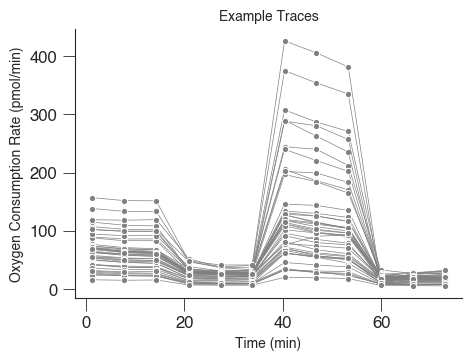

In [4]:
# load the filtered data
temp = pd.read_csv('../../seahorse/batch1.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

# plot keep ids
plt.figure(figsize=(5, 3.5))
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = '.', linewidth=0.5)
plt.legend().set_visible(False)
plt.title('Example Traces', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed10/rep_seahorse_curves_all.pdf', dpi=300, bbox_inches='tight')


Plot traces by line

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


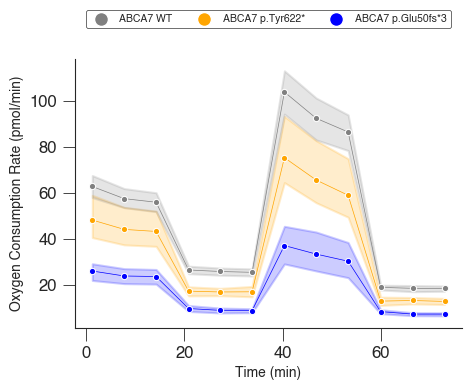

In [5]:
from matplotlib.lines import Line2D

# plot traces
plt.figure(figsize=(5, 3.5))

temp = x.df
sns.lineplot(data=temp[np.array([x in set(['Y622 25k', 'G2 25k', 'E3 25k']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])], x = 'Time', y='OCR', hue = 'Group', marker = '.', palette=['orange', 'grey',  'blue'], linewidth=0.5)

plt.legend().set_visible(False)
plt.title('', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)

labels = ['ABCA7 WT', 'ABCA7 p.Tyr622*', 'ABCA7 p.Glu50fs*3']
palette = {'ABCA7 WT': 'grey', 'ABCA7 p.Tyr622*': 'orange', 'ABCA7 p.Glu50fs*3': 'blue'}
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed10/rep_seahorse_curves_by_line.pdf', dpi=300, bbox_inches='tight')

#plt.savefig('../pdf_figures/batch_1_traces_25K.pdf')


Compute OCR metrics & save

Requires output from `x = ImageBrowser(file_path, long=False)`

either 

```python
keep_ids = x.keep_ids
```

or load them

```python
temp = pd.read_csv('../../seahorse/batch1.csv')
keep_ids = temp['0'][temp['keep']==1]
```

In [6]:
# compute results
df = temp[[i in set(keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

#df_quant.to_csv('../processed_data/batch1_df_quant.csv')

inspect conditions post filtering

(not enough 50 k cells to continue with those -> this density was not good -> produced poor curves, perhaps because cells were not all in contact with the plate)

In [7]:
# which conditions do we have after filtering?
df_quant = pd.read_csv('../../seahorse/batch1_df_quant.csv')
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2,3,4,5
0,E3 25k,E3 50k,G2 25k,G2 50k,Y622 25k,Y622 50k
1,10,8,7,1,7,9


In [8]:
# compute the means
T = (df_quant.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

Do stats

In [9]:
from scipy.stats import shapiro, levene, ttest_ind

group1 = df_quant[df_quant['condition'] == 'E3 25k']['1-CE']
group2 = df_quant[df_quant['condition'] == 'Y622 25k']['1-CE']
group3 = df_quant[df_quant['condition'] == 'G2 25k']['1-CE']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
stat3, p_norm3 = shapiro(group3)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2, p_norm3)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('levine for E3 vs Y622:', p_levene)

stat, p_levene = levene(group1, group3)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('levine for E3 vs G2:', p_levene)



comparison 1
normal distribution: 0.7534653935003595 0.24933889844763502 0.7584673198429445
levine for E3 vs Y622: 0.16024572942063792
levine for E3 vs G2: 0.00628945452156337


Plot results for first experiment / batch

E3 25k vs. Y622 25k: p=2.225e-05
E3 25k vs. G2 25k: p=2.868e-04


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


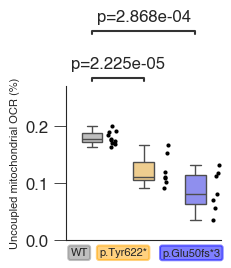

In [10]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

t_stat, p_value_A = ttest_ind(group1, group2, equal_var=True)
t_stat, p_value_B = ttest_ind(group1, group3, equal_var=False)

formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value_A, p_value_B]]


ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = 0.27, pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.rcParams.update({'font.size': 8})

#plt.savefig('../../paper/extended_plots/uncoupling_quantification_batch1.png', dpi=300, bbox_inches='tight')

### Analyze second dataset

Load data and do blinded QC

In [11]:
# load data
file_path = '../../seahorse/iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx'
x = ImageBrowser(file_path, long=False)

# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

#temp3.to_csv('../processed_data/seahorse_filtered/batch3.csv')

Output()

Load the filtered / QCed data & plot the traces

Text(0.5, 1.0, 'kept curves')

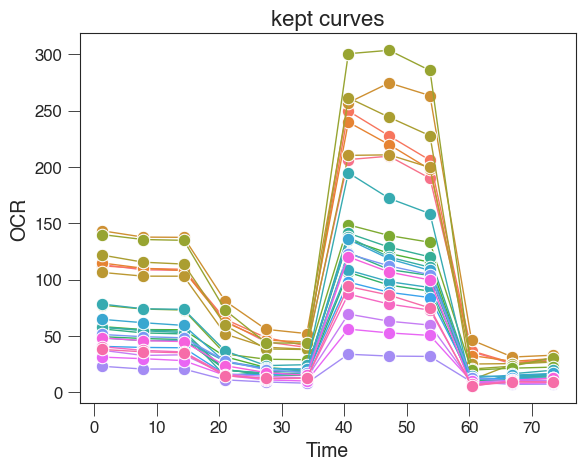

In [12]:
# load the filtered data
temp = pd.read_csv('../../seahorse/batch3.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

# plot keep ids
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', marker = 'o')
plt.legend().set_visible(False)
plt.title('kept curves')

Compute OCR metrics & save

Requires output from `x = ImageBrowser(file_path, long=False)`

either 

```python
keep_ids = x.keep_ids
```

or load them

```python
temp = pd.read_csv('../../seahorse/batch3.csv')
keep_ids = temp['0'][temp['keep']==1]
```

In [13]:
# compute results
df = temp[[i in set(keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

#df_quant.to_csv('../processed_data/seahorse_filtered/batch3_df_quant.csv')

inspect conditions post filtering

In [14]:
df_quant = pd.read_csv('../../seahorse/batch3_df_quant.csv')
# which conditions do we have after filtering?
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2
0,E3 25k,G2 25k,Y622 25k
1,8,6,10


stats

In [15]:
from scipy.stats import shapiro, levene, ttest_ind

group1 = df_quant[df_quant['condition'] == 'E3 25k']['1-CE']
group2 = df_quant[df_quant['condition'] == 'Y622 25k']['1-CE']
group3 = df_quant[df_quant['condition'] == 'G2 25k']['1-CE']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
stat3, p_norm3 = shapiro(group3)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2, p_norm3)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('levine for E3 vs Y622:', p_levene)

stat, p_levene = levene(group1, group3)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('levine for E3 vs G2:', p_levene)



comparison 1
normal distribution: 0.20525275984683414 0.04600281879964358 0.2678613199426215
levine for E3 vs Y622: 0.0653241825603735
levine for E3 vs G2: 0.6464659466220661


In [16]:
from scipy.stats import mannwhitneyu

# Assume group1 and group2 are your data arrays
u_stat, p_valu_A = mannwhitneyu(group1, group2, alternative='two-sided')
u_stat, p_valu_B = mannwhitneyu(group1, group3, alternative='two-sided')

formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_valu_A, p_valu_B]]
formatted_pvalues

['p=0.068', 'p=0.005']

plot

E3 25k vs. Y622 25k: p=0.068
E3 25k vs. G2 25k: p=0.005


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


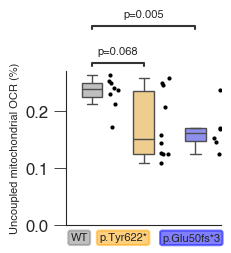

In [17]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = 0.27, pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.rcParams.update({'font.size': 8})


### Analyze third dataset

Load data and do blinded QC

In [18]:
# load data
file_path = '../../seahorse/iN030620240_ABCA7KO_CDP-choline_04032024.xlsx'
x = ImageBrowser(file_path, long=False)

# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

#temp3.to_csv('../processed_data/seahorse_filtered/batch4.csv')

Output()

Load the filtered / QCed data & plot the traces

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/81173171.py:12: UserWarning: The palette list has more values (96) than needed (16), which may not be intended.
  sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = '.', linewidth=0.5)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


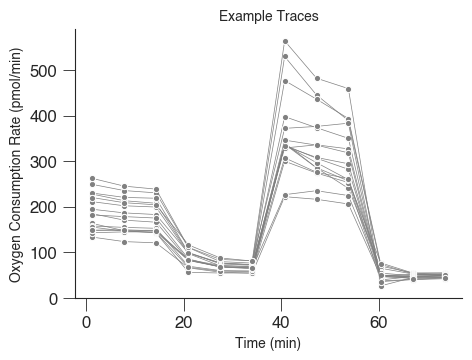

In [19]:
# load the filtered data
temp = pd.read_csv('../../seahorse/batch4.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

# also remove this well that has much lower OCR compared to the rest: G05 (this is G2 H2O, we don't have enough wells from this condition so it doesn't matter to the main results)
keep_ids = keep_ids[[x not in ['G05'] for x in keep_ids]] # missed this in first qc round

# plot keep ids
plt.figure(figsize=(5, 3.5))
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = '.', linewidth=0.5)
plt.legend().set_visible(False)
plt.title('Example Traces', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed12/ocr_choline_rep_curves.pdf', dpi=300, bbox_inches='tight')


Plot traces by condition

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


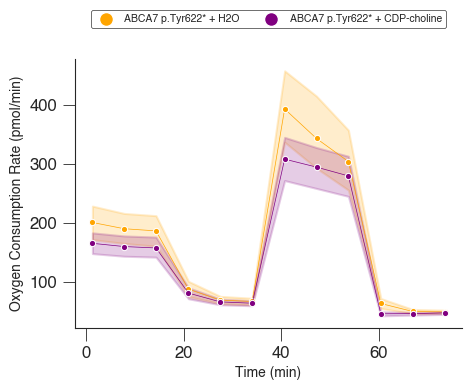

In [20]:
from matplotlib.lines import Line2D

# plot traces
plt.figure(figsize=(5, 3.5))

temp = x.df
sns.lineplot(data=temp[np.array([x in set(['Y622 H2O', 'Y622 CDP-choline']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])], x = 'Time', y='OCR', hue = 'Group', marker = '.', palette=['orange', 'purple'], linewidth=0.5)

plt.legend().set_visible(False)
plt.title('', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)

labels = ['ABCA7 p.Tyr622* + H2O', 'ABCA7 p.Tyr622* + CDP-choline']
palette = {'ABCA7 p.Tyr622* + H2O': 'orange', 'ABCA7 p.Tyr622* + CDP-choline': 'purple'}
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed12/ocr_choline_curves_by_treatment.pdf', dpi=300, bbox_inches='tight')


Compute OCR metrics & save

Requires output from `x = ImageBrowser(file_path, long=False)`

either 

```python
keep_ids = x.keep_ids
keep_ids = keep_ids[[x not in ['G05'] for x in keep_ids]] # missed this in first qc round

```

or load them

```python
# load the filtered data
temp = pd.read_csv('../../seahorse/batch4.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

# also remove this well that has much lower OCR compared to the rest: G05
keep_ids = keep_ids[[x not in ['G05'] for x in keep_ids]] # missed this in first qc round

```

In [21]:
# compute results
df = temp[[i in set(keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

#df_quant.to_csv('../processed_data/seahorse_filtered/batch4_df_quant.csv')

inspect conditions post filtering

In [22]:
df_quant = pd.read_csv('../../seahorse/batch4_df_quant.csv')
# which conditions do we have after filtering?
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2
0,G2 CDP-choline,Y622 CDP-choline,Y622 H2O
1,2,8,6


stats

In [23]:
from scipy.stats import shapiro, levene, ttest_ind

group1 = df_quant[df_quant['condition'] == 'Y622 H2O']['1-CE']
group2 = df_quant[df_quant['condition'] == 'Y622 CDP-choline']['1-CE']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('equal variances:', p_levene)




comparison 1
normal distribution: 0.30559128566459687 0.5849259413185056
equal variances: 0.03793459630763133


In [24]:
t_stat, p_value_A = ttest_ind(group1, group2, equal_var=False)

formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value_A]]
formatted_pvalues

['p=0.002']

plot uncoupled ratio

In [25]:
# compute the means
T = (df_quant.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


Y622 H2O vs. Y622 CDP-choline: p=0.002


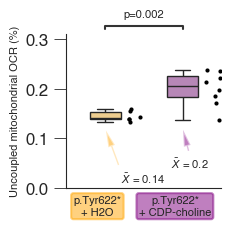

In [26]:
plt.figure(figsize=(2,2))

order = ['Y622 H2O', 'Y622 CDP-choline']
pairs = [(('Y622 H2O'), ('Y622 CDP-choline'))]
palette=['orange', 'purple']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(df_quant['1-CE']), pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)


ax1.text(-0.1, -0.05, "p.Tyr622*\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(.9, -0.05, "p.Tyr622*\n+ CDP-choline", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="purple", ec="purple", alpha=0.5), fontsize=8)


name = 'Y622 H2O'
i = 0
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(0, .12),
                    xytext=(0.2 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'Y622 CDP-choline'
i = 1
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1, .12),
                    xytext=(0.85 , 0.04), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))


plt.rcParams.update({'font.size': 8})


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/fig4/uncoupling_choline_quantification.pdf', dpi=300, bbox_inches='tight')

plot src

In [27]:
from scipy.stats import shapiro, levene, ttest_ind

group1 = df_quant[df_quant['condition'] == 'Y622 H2O']['SRC']
group2 = df_quant[df_quant['condition'] == 'Y622 CDP-choline']['SRC']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('equal variances:', p_levene)




comparison 1
normal distribution: 0.10296322740800463 0.5264234680761484
equal variances: 0.6471245760694604


In [28]:
t_stat, p_value_A = ttest_ind(group1, group2, equal_var=True)

formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value_A]]
formatted_pvalues

['p=0.681']

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


Y622 H2O vs. Y622 CDP-choline: p=0.681


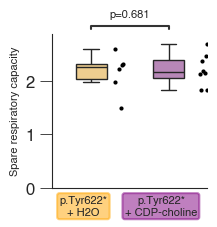

In [29]:
plt.figure(figsize=(2,2))

order = ['Y622 H2O', 'Y622 CDP-choline']
pairs = [(('Y622 H2O'), ('Y622 CDP-choline'))]
palette=['orange', 'purple']
df_quant['SRC'] = 1/df_quant['SRC'] # computed before I fixed this from basal/max_resp to max_resp/basal

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', 'SRC', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(df_quant['SRC'])+.2, pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Spare respiratory capacity', fontsize=8)


ax1.text(-0.1, -0.05, "p.Tyr622*\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(.9, -0.05, "p.Tyr622*\n+ CDP-choline", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="purple", ec="purple", alpha=0.5), fontsize=8)


plt.rcParams.update({'font.size': 8})


plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed12/src_choline_quantification.pdf', dpi=300, bbox_inches='tight')

## Plot Experiment 1 & 2 together

In [30]:
df_quant = pd.read_csv('../../seahorse/batch1_df_quant.csv')
df_quant2 = pd.read_csv('../../seahorse/batch3_df_quant.csv')
all_data = pd.concat((df_quant2, df_quant))
all_data.index = np.arange(len(all_data)) 

In [31]:
# compute the means
T = (all_data.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

In [32]:
pd.DataFrame(np.unique(all_data['condition'], return_counts=True))

,0,1,2,3,4,5
0,E3 25k,E3 50k,G2 25k,G2 50k,Y622 25k,Y622 50k
1,18,8,13,1,17,9


In [33]:
from scipy.stats import shapiro, levene, ttest_ind

group1 = df_quant[df_quant['condition'] == 'E3 25k']['1-CE']
group2 = df_quant[df_quant['condition'] == 'Y622 25k']['1-CE']
group3 = df_quant[df_quant['condition'] == 'G2 25k']['1-CE']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
stat3, p_norm3 = shapiro(group3)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2, p_norm3)

stat, p_levene = levene(group1, group2)
stat, p_levene2 = levene(group1, group3)
# Decide whether to assume equal variances
print('equal variances for E3 vs Y622:', p_levene)
print('equal variances for E3 vs G2:', p_levene2)



comparison 1
normal distribution: 0.7534653935003595 0.24933889844763502 0.7584673198429445
equal variances for E3 vs Y622: 0.16024572942063792
equal variances for E3 vs G2: 0.00628945452156337


In [34]:
t_stat, p_value_A = ttest_ind(group1, group2, equal_var=True)
t_stat, p_value_B = ttest_ind(group1, group3, equal_var=False)
formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value_A, p_value_B]]
formatted_pvalues

['p=2.225e-05', 'p=2.868e-04']

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


E3 25k vs. Y622 25k: p=2.225e-05
E3 25k vs. G2 25k: p=2.868e-04


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


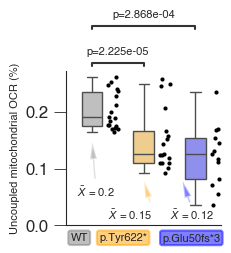

In [35]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(all_data, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(all_data['1-CE'])+0.01, pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)



name = 'E3 25k'
i = 0
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(0, .15),
                    xytext=(-0.3 , 0.05), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'Y622 25k'
i = 1
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1, .08),
                    xytext=(0.3 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'G2 25k'
i = 2
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1.742, .08),
                    xytext=(1.5 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))



plt.rcParams.update({'font.size': 8})


plt.rcParams.update({'font.size': 8})

plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/fig3/uncoupling.pdf', dpi=300, bbox_inches='tight')

In [36]:
from scipy.stats import shapiro, levene, ttest_ind
all_data['SRC'] = 1/all_data['SRC'] # computed before I fixed this from basal/max_resp to max_resp/basal

group1 = all_data[all_data['condition'] == 'E3 25k']['SRC']
group2 = all_data[all_data['condition'] == 'Y622 25k']['SRC']
group3 = all_data[all_data['condition'] == 'G2 25k']['SRC']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
stat3, p_norm3 = shapiro(group3)
print('comparison 1')
print('normal distribution:', p_norm1, p_norm2, p_norm3)

stat, p_levene = levene(group1, group2)
stat, p_levene2 = levene(group1, group3)
# Decide whether to assume equal variances
print('equal variances for E3 vs Y622:', p_levene)
print('equal variances for E3 vs G2:', p_levene2)



comparison 1
normal distribution: 0.5559733444606196 0.04905712528614343 0.30818852923588586
equal variances for E3 vs Y622: 0.00890029855705303
equal variances for E3 vs G2: 0.0015175465848369027


In [37]:
t_stat, p_value_A = mannwhitneyu(group1, group2, alternative='two-sided')
t_stat, p_value_B = ttest_ind(group1, group3, equal_var=False)
formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value_A, p_value_B]]
formatted_pvalues

['p=0.330', 'p=0.303']

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_4696/74698558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


E3 25k vs. Y622 25k: p=0.330
E3 25k vs. G2 25k: p=0.303


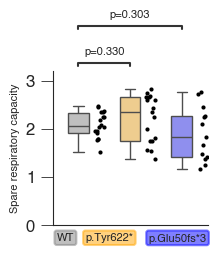

In [38]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(all_data, 'condition', 'SRC', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(all_data['SRC'])+0.1, pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Spare respiratory capacity', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)


plt.rcParams.update({'font.size': 8})


plt.rcParams.update({'font.size': 8})

plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed10/SRC.pdf', dpi=300, bbox_inches='tight')